In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook")
plt.rcParams["figure.figsize"] = (15,6)

In [2]:
import sqlite3
con = sqlite3.connect('app.db')
acc_df = pd.read_sql('select * from account', con, index_col='id')
agent_df = pd.read_sql('select * from agent', con, index_col='id')
cat_df = pd.read_sql('select * from category', con, index_col='id')
cur_df = pd.read_sql('select * from currency', con, index_col='id')
tr_df = pd.read_sql('select * from trans', con, index_col='id')

In [3]:
tr_df['date_issued'] = pd.to_datetime(tr_df['date_issued'], format="%Y-%m-%d %H:%M:%S.%f")
acc_df['date_created'] = pd.to_datetime(acc_df['date_created'], format="%Y-%m-%d %H:%M:%S.%f")
tr_df['time'] = tr_df['date_issued'].dt.hour * 60 + tr_df['date_issued'].dt.minute
tr_df['category'] = tr_df.category_id.map(cat_df.desc)
tr_df['account'] = tr_df.account_id.map(acc_df.desc)
tr_df['currency'] = tr_df.account_id.map(acc_df.currency_id).map(cur_df.code)
tr_df['agent'] = tr_df.agent_id.map(agent_df.desc)

In [8]:
analysis_sql_p = "app/static/sql/analysis.sql"
with open(analysis_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    analysis = pd.read_sql_query(sql, con, params={'cid':0}, parse_dates=['date_issued'])

analysis['time'] = analysis['date_issued'].dt.hour * 60 + analysis['date_issued'].dt.minute
analysis['is_expense'] = analysis['is_expense'].apply(lambda x: x == 1)
analysis

,amount,date_issued,is_expense,cat_id,category,agent_id,agent,comment,currency,account_id,account,time
0,40.00,2019-08-07 17:15:00,True,7,Eating Out,1,Hiltl,Hiltl mit Jau,CHF,2,Jugendprivatkonto STU-Card,1035
1,9.50,2019-08-14 15:20:00,True,12,Usgang,2,Coop City Bellevue,Rahmbläserkapseln,CHF,2,Jugendprivatkonto STU-Card,920
2,8.85,2019-08-14 15:30:00,True,7,Eating Out,3,Coop Stadelhofen,Zmittag nach Ferienplausch mit Jaù i think,CHF,2,Jugendprivatkonto STU-Card,930
3,4.40,2019-08-16 20:00:00,True,4,Transportation,4,SBB Wetzikon,Zurück von Berglauf,CHF,2,Jugendprivatkonto STU-Card,1200
4,10.35,2019-08-16 20:30:00,True,7,Eating Out,3,Coop Stadelhofen,Znacht auf Sächsilüteplatz nach Berglauf,CHF,2,Jugendprivatkonto STU-Card,1230
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,82.05,2021-05-17 15:00:00,True,15,Personal,478,Coop Bau+Hobby Oerlikon Eleven,Holz für Schrankboxen,CHF,2,Jugendprivatkonto STU-Card,900
1051,43.95,2021-05-18 09:46:00,True,15,Personal,80,InterDiscount Shopville,Shelfy Drucker Papier & Patronen,CHF,2,Jugendprivatkonto STU-Card,586
1052,17.00,2021-05-19 18:32:00,True,7,Eating Out,66,Kleine Freiheit,Mezze Gemischt + Ingwer Tee,CHF,0,remote,1112
1053,650.00,2021-05-20 00:00:00,True,9,Rent,467,Mietkonto Dörflistr,,CHF,2,Jugendprivatkonto STU-Card,0


In [9]:
unique = list(analysis.category.unique())

l = len(unique)
colors = sns.color_palette([list(sns.color_palette("bright", 10))[i] for i in [0, 1, 3, 4, 9]][:min(5, l)]
         + list(sns.color_palette("colorblind", 10))[:min(max(0, l-5), 10)]
         + list(sns.color_palette("husl", max(0, l-15)))[:max(0, l-15)])
display(colors)
print(len(colors))
unique = sorted(unique, key=lambda c: analysis.category.value_counts()[c], reverse=True)
print(", ".join(unique))
colors = dict(zip(unique, colors))

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.0, 0.8431372549019608, 1.0),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

20
Snacks, Eating Out, Transportation, Lebensmittel, Usgang, Miscellaneous, Gifts, Lohn, Personal, Lodging, Sport, Entertainment, Clothes, Health, Unrecorded, Education, Hygiene, Rent, Kinderlohn, Taxes


In [10]:
import viz

In [12]:
viz.overview.month_overview(analysis, "04.21", palette=colors)

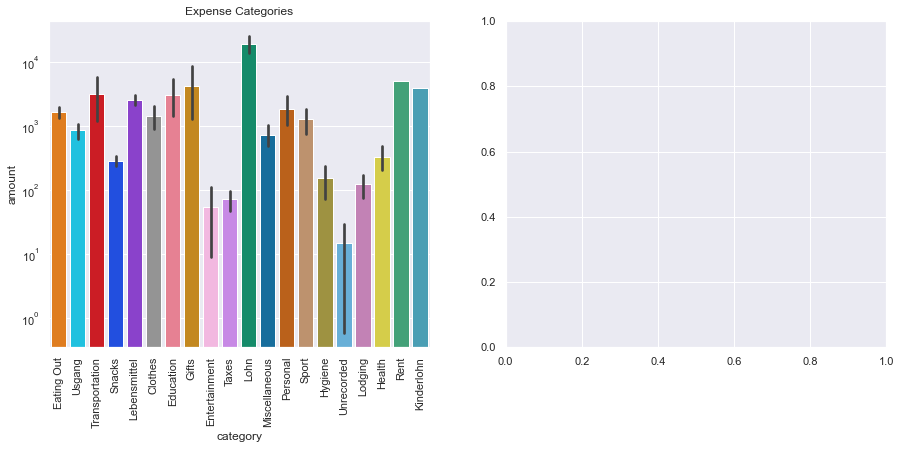

In [54]:
viz.overview.overview(viz.select.select(tr_df, date_start="2017-01-01", date_end="2021-12-31"), 'CHF', palette=colors)

In [15]:
viz.overview.overview(viz.select.select(tr_df, currency='JPY'), 'JPY', lim=5000, palette=colors)

In [16]:
viz.overview.overview(viz.select.select(tr_df, currency='EUR'), 'EUR', palette=colors)

In [17]:
type(viz.select.select(tr_df, exp=1).groupby('category')['amount'].sum())

pandas.core.series.Series

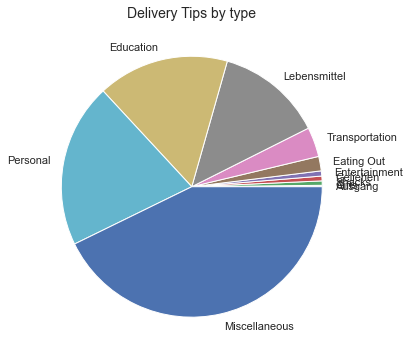

In [18]:
pie, ax = plt.subplots(figsize=[10,6])
sums = viz.select.select(tr_df, exp=1, date_start="2020-12-01").groupby('category')['amount'].sum()
sums = sums[sums.index != "Kontoübertrag"].sort_values(axis=0)
plt.pie(x=sums, labels=sums.keys())
plt.title("Delivery Tips by type", fontsize=14);

In [19]:
print(viz.select.select(tr_df, date_start="2020-01-01", categories=["Lohn"])["amount"].sum())
viz.select.select(tr_df, date_start="2020-01-01", categories=["Lohn"])

-12977.650000000001


,account_id,amount,date_issued,comment,agent_id,category_id,time,category,account,currency,agent
id,,,,,,,,,,,
264,2,-860.00,2020-01-20 00:00:00,Röthlisberger Sideboard,146,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Stefano Stival
297,2,-1644.15,2020-02-05 00:00:00,"Januar 20, 75.68h",38,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Yume-Ramen GmbH
311,1,-60.00,2020-02-08 17:00:00,"Entgelt für Mo, 03.02.",165,15,1020,Lohn,Bargeld CHF,CHF,Rudi Manser
682,2,-140.00,2020-03-23 00:00:00,,384,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Schweizer Skischule Luzern
792,2,-888.55,2020-07-06 00:00:00,"Juni 20, 39.72h",38,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Yume-Ramen GmbH
822,2,-420.45,2020-07-27 00:00:00,Juli 20,38,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Yume-Ramen GmbH
872,2,-656.15,2020-09-04 00:00:00,August 20,38,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Yume-Ramen GmbH
918,2,-1690.50,2020-09-25 00:00:00,Ferienplausch,43,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Stadt Zürich
946,2,-687.15,2020-10-06 00:00:00,Sep 20,38,15,0,Lohn,Jugendprivatkonto STU-Card,CHF,Yume-Ramen GmbH


In [25]:
spent = viz.select.select(tr_df, date_start="2020-11-01", categories=["Lebensmittel", "Eating Out", "Snacks"])["amount"].sum()

In [29]:
day = spent / (dt.datetime.now() - dt.datetime.strptime("2020-11-01", "%Y-%m-%d")).days

In [30]:
day * 365.25 / 12

286.796753875969

In [25]:
changes_sql_p = "app/static/sql/changes.sql"
with open(changes_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    changes = pd.read_sql_query(sql, con, params={'id':2}, parse_dates=['date_issued'])
    
changes

,id,amount,is_expense,agent_id,agent_desc,date_issued,cat_id,direct_flow_in,comment
0,1,40.00,1,1,Hiltl,2019-08-07 17:15:00,7.0,NaN,Hiltl mit Jau
1,2,9.50,1,2,Coop City Bellevue,2019-08-14 15:20:00,12.0,NaN,Rahmbläserkapseln
2,3,8.85,1,3,Coop Stadelhofen,2019-08-14 15:30:00,7.0,NaN,Zmittag nach Ferienplausch mit Jaù i think
3,4,4.40,1,4,SBB Wetzikon,2019-08-16 20:00:00,4.0,NaN,Zurück von Berglauf
4,5,10.35,1,3,Coop Stadelhofen,2019-08-16 20:30:00,7.0,NaN,Znacht auf Sächsilüteplatz nach Berglauf
...,...,...,...,...,...,...,...,...,...
638,1208,43.95,1,80,InterDiscount Shopville,2021-05-18 09:46:00,15.0,NaN,Shelfy Drucker Papier & Patronen
639,1216,30.00,1,49,Tim Furrer,2021-05-18 10:31:00,NaN,0.0,
640,1215,17.00,1,530,Myriam Vonnegut,2021-05-19 20:15:00,NaN,0.0,Mezze
641,1217,650.00,1,467,Mietkonto Dörflistr,2021-05-20 00:00:00,9.0,NaN,


In [30]:
analysis_sql_p = "app/static/sql/analysis.sql"
with open(analysis_sql_p, "r") as f:
    sql = ''.join(f.readlines())
    analysis = pd.read_sql_query(sql, con, params={'cid':1}, parse_dates=['date_issued'])
    
analysis

,amount,date_issued,is_expense,id,desc,id,desc,comment
0,40.00,2019-08-07 17:15:00,1.0,7,Eating Out,1,Hiltl,Hiltl mit Jau
1,9.50,2019-08-14 15:20:00,1.0,12,Usgang,2,Coop City Bellevue,Rahmbläserkapseln
2,8.85,2019-08-14 15:30:00,1.0,7,Eating Out,3,Coop Stadelhofen,Zmittag nach Ferienplausch mit Jaù i think
3,4.40,2019-08-16 20:00:00,1.0,4,Transportation,4,SBB Wetzikon,Zurück von Berglauf
4,10.35,2019-08-16 20:30:00,1.0,7,Eating Out,3,Coop Stadelhofen,Znacht auf Sächsilüteplatz nach Berglauf
...,...,...,...,...,...,...,...,...
715,82.05,2021-05-17 15:00:00,1.0,15,Personal,478,Coop Bau+Hobby Oerlikon Eleven,Holz für Schrankboxen
716,43.95,2021-05-18 09:46:00,1.0,15,Personal,80,InterDiscount Shopville,Shelfy Drucker Papier & Patronen
717,17.00,2021-05-19 18:32:00,1.0,7,Eating Out,66,Kleine Freiheit,Mezze Gemischt + Ingwer Tee
718,650.00,2021-05-20 00:00:00,1.0,9,Rent,467,Mietkonto Dörflistr,
